In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
import time


In [2]:
UC= pd.read_csv('User_Comments.csv')
print(UC.head()) 

                              COMMENT_ID     DATE  \
0    z12auh0b1vajetih404cfbl5uyfehpi4kb4  26:00.0   
1      z124fn5ahqnfdbxtg23ihlijyqjqtr1lk  08:10.0   
2  z13zj535dsqgcfyot04cixgics3zdrspsqw0k  57:52.9   
3      z12pcbng1m2shlgkp23ki1izwkreylid3  15:09.0   
4    z130tpc5mwbqtxkox04cipervsaysn0w22o  47:52.0   

                                             CONTENT  CLASS  
0  Since when has Katy Perry had her own YouTube ...      0  
1                                   Sub my channel!﻿      1  
2                                    ILove shakira ﻿      0  
3  How did THIS Video in all of YouTube get this ...      0  
4  Katy Perry - Roar (Official): http://youtu.be/...      0  


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x=UC['CONTENT']
y=UC['CLASS']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

In [5]:
#Q1(a)
corpus=x_train.tolist() + x_test.tolist()
vectorizer = TfidfVectorizer(max_features = 500,min_df = 2,max_df=0.97,stop_words = 'english',
                            analyzer='word', ngram_range=(1, 3))
x_count= vectorizer.fit_transform(corpus)
x_count.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
print(vectorizer.get_feature_names())

['000', '000 000', '000 000 000', '000 000 views', '000 views', '100', '2014', '2015', '25', '2billion', '39', '39 understand', '39 watching', '4netjobs', '4netjobs com', '666', 'actually', 'adf', 'adf ly', 'africa', 'african', 'ago', 'amazing', 'american', 'amp', 'animal', 'animals', 'anthem', 'appreciate', 'artist', 'awesome', 'baby', 'bad', 'beautiful', 'beautiful song', 'believe', 'bennett', 'best', 'best song', 'best songs', 'better', 'big', 'big fan', 'billion', 'billion views', 'birthday', 'bit', 'black', 'boy', 'br', 'br br', 'br br br', 'br href', 'buy', 'called', 'came', 'came check', 'cevxzvsjlk8', 'champion', 'chance', 'channel', 'channel subscribe', 'charlie', 'charlie lost', 'check', 'check channel', 'check new', 'check playlist', 'check playlist youtube', 'check video', 'check video youtube', 'check views', 'checking', 'click', 'close', 'com', 'com ref', 'com watch', 'come', 'comes', 'coming', 'comment', 'comments', 'completely', 'cool', 'cover', 'crazy', 'cup', 'cup son

In [7]:
x_count.shape
x_count_train = x_count[:len(x_train)]
x_count_train.shape

(940, 500)

In [8]:
x_count_test = x_count[-len(x_test):]
x_count_test.shape


(235, 500)

In [9]:
#(b)
param_grid = {'n_estimators': np.arange(1,30,5), 'max_depth': np.arange(5,50,10), }

clf_cv1 = GridSearchCV(ensemble.RandomForestClassifier(class_weight = 'balanced'), param_grid,
                      return_train_score=True,cv=5)
print("Running....")

tic = time.time()
clf_cv1.fit(x_count_train,y_train)
toc = time.time()
print("Training time: {0}s".format(toc - tic))
clf = clf_cv1.best_estimator_
print(clf)


Running....
Training time: 5.5420427322387695s
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=35, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=26, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [10]:
clf1 = ensemble.RandomForestClassifier(class_weight = 'balanced') 
clf1.fit(x_count_train, y_train)
y_pred = clf1.predict(x_count_test) 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.96      0.99      0.98       191
          1       0.97      0.84      0.90        44

avg / total       0.97      0.97      0.96       235

[[190   1]
 [  7  37]]


In [11]:
clf_cv1.best_params_ , clf_cv1.best_score_


({'max_depth': 35, 'n_estimators': 26}, 0.9638297872340426)

In [12]:
clf_cv2 = GridSearchCV(ensemble.RandomForestClassifier(class_weight = 'balanced',n_estimators=21,max_depth=35), 
                       param_grid, return_train_score=True,cv=5)
clf_cv2.fit(x_count_train, y_train)
y_pred = clf_cv2.predict(x_count_test) 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Running....")





             precision    recall  f1-score   support

          0       0.97      1.00      0.98       191
          1       1.00      0.86      0.93        44

avg / total       0.98      0.97      0.97       235

[[191   0]
 [  6  38]]
Running....


In [13]:
clf_cv2.best_params_, clf_cv2.best_score_

({'max_depth': 45, 'n_estimators': 21}, 0.9648936170212766)

In [14]:
print(clf_cv2.cv_results_)


{'mean_fit_time': array([0.00641823, 0.01284223, 0.02041144, 0.02807889, 0.03719759,
       0.04543877, 0.00469522, 0.01360893, 0.03051715, 0.04357667,
       0.05199494, 0.0556026 , 0.00430756, 0.01841259, 0.04338336,
       0.04544139, 0.06218696, 0.05104742, 0.00446124, 0.01492496,
       0.03758678, 0.04228897, 0.05538135, 0.06926708, 0.00781093,
       0.02279625, 0.02707744, 0.04120607, 0.06761703, 0.07578201]), 'std_fit_time': array([0.00155454, 0.00099224, 0.00153785, 0.00082564, 0.00107304,
       0.00176008, 0.00042589, 0.00126037, 0.00422869, 0.0033685 ,
       0.0075103 , 0.00542074, 0.00055748, 0.00389577, 0.00806384,
       0.00566391, 0.0081976 , 0.00568901, 0.00050305, 0.00081969,
       0.00240523, 0.00651011, 0.00707576, 0.01163744, 0.00094733,
       0.00106625, 0.00609615, 0.00556404, 0.00433685, 0.01431105]), 'mean_score_time': array([0.00142255, 0.00156927, 0.00210476, 0.00270529, 0.00323939,
       0.00365791, 0.00100999, 0.00151591, 0.00301242, 0.00425858,
     

In [15]:
import matplotlib.pyplot as plt



In [16]:
m_test_s = clf_cv2.cv_results_['mean_test_score']
m_test_s.shape

(30,)

In [17]:
m_train_s= clf_cv2.cv_results_['mean_train_score']
m_train_s.shape

(30,)

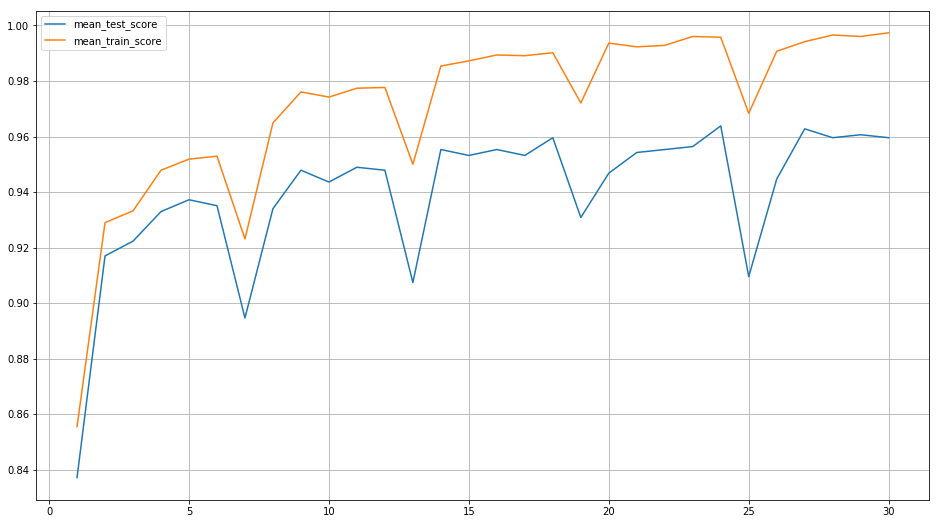

In [18]:
###(c)
m_test_s = clf_cv1.cv_results_['mean_test_score']
m_train_s= clf_cv1.cv_results_['mean_train_score']

plt.figure(figsize=(16,9))
plt.plot(np.arange(1,31),m_test_s, label = "mean_test_score")
plt.plot(np.arange(1,31),m_train_s, label = "mean_train_score")
plt.legend()
plt.grid()



In [19]:
#(d)
import sklearn


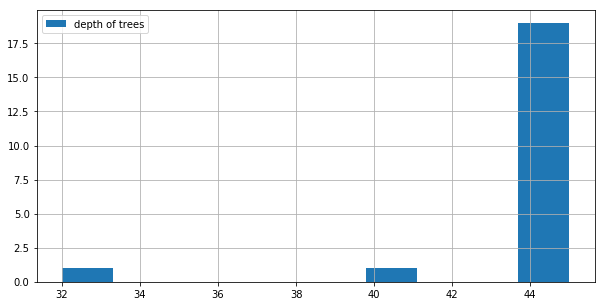

In [20]:
estimator = clf_cv2.best_estimator_
estimator.fit(x_count_train, y_train)
depth = [estimator.tree_.max_depth for estimator in estimator]
plt.figure(figsize=(10,5))
plt.hist(depth, label = "depth of trees")
plt.legend()
plt.grid()

In [21]:
top10_important = estimator.feature_importances_.argsort()[::-1][:10]

In [22]:
print(top10_important)

[ 64 401  75 476 175  60 373 441 403  69]


In [23]:
top10_important = estimator.feature_importances_.argsort()[::-1][:10]
# top10_important_features = []
for index in top10_important:
    print(vectorizer.get_feature_names()[index])



check
subscribe
com
www
http
channel
song
video youtube
subscribers
check video


In [24]:
#Task B
NBA_train= pd.read_csv('NBA_Train.csv')
NBA_test=pd.read_csv('NBA_Test.csv')
NBA_test_target=pd.read_csv('NBA_Test_Target.csv')
print(NBA_train.head()) 

   Train_ID    SALARY POSITION                TEAM  Age  Games  Minutes   PER  \
0         1  2.288205       SG       Orlando Magic   21     76     1503  10.3   
1         2  2.139000       PG  Washington Wizards   29     52     1114  12.5   
2         3  8.000000       SG     New York Knicks   28     73     2552  16.0   
3         4  5.158539       SG   Memphis Grizzlies   32     55     1278  15.6   
4         5  3.333333       PF       Atlanta Hawks   25     80     1482  15.3   

      TS  ORB ...    AST  STL  BLK   TOV   USG  ORtg  DRtg  OWS  DWS   WS  
0  0.533  2.4 ...   11.6  1.1  0.3  14.3  19.7   101   111  0.6  0.8  1.4  
1  0.530  1.0 ...   13.0  0.8  0.0  11.0  23.8   102   113  0.6  0.3  1.0  
2  0.574  1.4 ...   16.9  0.7  0.1  11.2  23.3   110   112  4.3  1.0  5.3  
3  0.531  7.3 ...   11.7  3.8  1.2  16.2  20.1   102   101  0.5  2.1  2.7  
4  0.559  4.9 ...    8.9  1.0  0.4  10.3  23.5   105   108  1.3  1.2  2.6  

[5 rows x 22 columns]


In [25]:
print(NBA_test.head())

   Test_ID POSITION                   TEAM  Age  Games  Minutes   PER     TS  \
0        1       SG              Utah Jazz   22     78     2193  15.8  0.547   
1        2       PG           Phoenix Suns   22     75     1132   8.8  0.390   
2        3       SF          Chicago Bulls   22     77     1231   8.0  0.489   
3        4        C              Utah Jazz   23     58      684  15.2  0.590   
4        5       PF  Golden State Warriors   27     82     2007  11.1  0.523   

   ORB   DRB ...    AST  STL  BLK   TOV   USG  ORtg  DRtg  OWS  DWS   WS  
0  3.0  10.7 ...   16.9  1.7  0.5  13.0  23.9   106   113  2.6  0.6  3.2  
1  1.9   8.8 ...   30.8  3.1  0.3  24.2  14.1    89   107 -1.0  1.1  0.1  
2  1.8   9.6 ...    9.1  1.3  0.9  11.1  14.9    97   104 -0.1  1.7  1.6  
3  8.2  17.4 ...    5.6  1.1  6.1  11.0  12.0   122   108  1.2  0.6  1.8  
4  8.5  21.3 ...    4.1  0.8  2.3  14.5  14.4   103   108  0.9  1.7  2.7  

[5 rows x 21 columns]


In [26]:
print(NBA_test_target.head())

   Test_ID    SALARY
0        1  9.463484
1        2  0.055722
2        3  1.535880
3        4  0.947276
4        5  7.008475


In [27]:
NBA_train.isnull().sum()

Train_ID    0
SALARY      0
POSITION    0
TEAM        0
Age         0
Games       0
Minutes     0
PER         0
TS          0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
USG         0
ORtg        0
DRtg        0
OWS         0
DWS         0
WS          0
dtype: int64

In [28]:
# NBA_test_train=pd.concat([NBA_test,NBA_train])

In [29]:
# NBA_test_train.head()

In [30]:
# NBA_test_train.corr()

In [31]:
# dummies_total = pd.get_dummies(NBA_test_train,drop_first = True)
#dummies_total.head()

In [32]:
#X=dummies_total.corr()

In [33]:
# corr_postive = X['SALARY'].sort_values(ascending=False)
# corr_postive.head()

In [34]:
#corr_negative = X['SALARY'].sort_values(ascending=True)
#corr_negative.head()

In [35]:
### only train set
dummies_train = pd.get_dummies(NBA_train,drop_first = True)
dummies_train.corr()



,Train_ID,SALARY,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,...,TEAM_Oklahoma City Thunder,TEAM_Orlando Magic,TEAM_Philadelphia 76ers,TEAM_Phoenix Suns,TEAM_Portland Trail Blazers,TEAM_Sacramento Kings,TEAM_San Antonio Spurs,TEAM_Toronto Raptors,TEAM_Utah Jazz,TEAM_Washington Wizards
Train_ID,1.000000,0.015614,-0.052276,-0.107212,-0.105153,-0.105587,0.027501,-0.064495,-0.048178,-0.057413,...,-0.095998,-0.207828,0.136288,0.017252,0.110410,-0.175603,0.061488,0.134355,0.144254,0.045971
SALARY,0.015614,1.000000,0.047127,0.178519,0.611797,0.673514,0.215776,-0.051990,0.170403,0.092445,...,-0.034011,-0.052698,-0.015978,0.009663,-0.027579,-0.080102,0.101253,-0.018930,-0.111587,0.002983
Age,-0.052276,0.047127,1.000000,-0.116049,-0.008495,0.096833,0.225454,-0.074907,0.052825,0.007839,...,-0.030885,-0.062766,-0.005035,-0.083016,-0.098613,-0.033020,0.159585,0.025772,-0.114869,0.053618
Games,-0.107212,0.178519,-0.116049,1.000000,0.693423,0.193910,0.203294,-0.023049,-0.063902,-0.050916,...,0.200312,0.046683,-0.144739,-0.253959,0.035475,0.086493,0.027219,0.153306,-0.079491,0.058725
Minutes,-0.105153,0.611797,-0.008495,0.693423,1.000000,0.534992,0.232841,-0.278158,-0.130930,-0.201730,...,0.066677,-0.048814,-0.057180,-0.140619,0.025444,0.086057,0.028985,0.074354,-0.143982,0.040793
PER,-0.105587,0.673514,0.096833,0.193910,0.534992,1.000000,0.499589,0.112426,0.330422,0.264837,...,0.006387,-0.134489,-0.109070,0.106077,0.066289,-0.091545,0.102910,0.006012,-0.047142,0.016566
TS,0.027501,0.215776,0.225454,0.203294,0.232841,0.499589,1.000000,0.041078,0.000595,0.023403,...,0.140513,-0.107301,-0.067618,0.081137,0.033869,-0.064164,0.082971,-0.003940,-0.055225,0.008869
ORB,-0.064495,-0.051990,-0.074907,-0.023049,-0.278158,0.112426,0.041078,1.000000,0.751727,0.902180,...,0.012560,-0.016859,-0.107406,-0.022630,0.040536,-0.116563,-0.057147,-0.031235,0.139103,-0.083016
DRB,-0.048178,0.170403,0.052825,-0.063902,-0.130930,0.330422,0.000595,0.751727,1.000000,0.961952,...,-0.115804,0.049634,-0.064734,0.063408,-0.001192,-0.104622,0.032271,0.007649,0.098808,-0.074623
TRB,-0.057413,0.092445,0.007839,-0.050916,-0.201730,0.264837,0.023403,0.902180,0.961952,1.000000,...,-0.068630,0.024743,-0.088652,0.032499,0.015979,-0.118968,0.004134,-0.004052,0.118966,-0.087182


In [36]:
dummies_train.shape
dummies_train.columns



Index(['Train_ID', 'SALARY', 'Age', 'Games', 'Minutes', 'PER', 'TS', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'USG', 'ORtg', 'DRtg', 'OWS',
       'DWS', 'WS', 'POSITION_PF', 'POSITION_PG', 'POSITION_SF', 'POSITION_SG',
       'TEAM_Boston Celtics', 'TEAM_Brooklyn Nets', 'TEAM_Charlotte Hornets',
       'TEAM_Chicago Bulls', 'TEAM_Cleveland Cavaliers',
       'TEAM_Dallas Mavericks', 'TEAM_Denver Nuggets', 'TEAM_Detroit Pistons',
       'TEAM_Golden State Warriors', 'TEAM_Houston Rockets',
       'TEAM_Indiana Pacers', 'TEAM_Los Angeles Clippers',
       'TEAM_Los Angeles Lakers', 'TEAM_Memphis Grizzlies', 'TEAM_Miami Heat',
       'TEAM_Milwaukee Bucks', 'TEAM_Minnesota Timberwolves',
       'TEAM_New Orleans Pelicans', 'TEAM_New York Knicks',
       'TEAM_Oklahoma City Thunder', 'TEAM_Orlando Magic',
       'TEAM_Philadelphia 76ers', 'TEAM_Phoenix Suns',
       'TEAM_Portland Trail Blazers', 'TEAM_Sacramento Kings',
       'TEAM_San Antonio Spurs', 'TEAM_Toronto Raptor

In [45]:
features = ['Age', 'Games', 'Minutes', 'PER', 'TS', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'USG', 'ORtg', 'DRtg', 'OWS',
       'DWS', 'WS', 'POSITION_PF', 'POSITION_PG', 'POSITION_SF', 'POSITION_SG',
       'TEAM_Boston Celtics', 'TEAM_Brooklyn Nets', 'TEAM_Charlotte Hornets',
       'TEAM_Chicago Bulls', 'TEAM_Cleveland Cavaliers',
       'TEAM_Dallas Mavericks', 'TEAM_Denver Nuggets', 'TEAM_Detroit Pistons',
       'TEAM_Golden State Warriors', 
       'TEAM_Indiana Pacers', 'TEAM_Los Angeles Clippers',
       'TEAM_Los Angeles Lakers', 'TEAM_Memphis Grizzlies', 'TEAM_Miami Heat',
       'TEAM_Milwaukee Bucks', 'TEAM_Minnesota Timberwolves',
       'TEAM_New Orleans Pelicans', 'TEAM_New York Knicks',
       'TEAM_Oklahoma City Thunder', 'TEAM_Orlando Magic',
       'TEAM_Philadelphia 76ers', 'TEAM_Phoenix Suns',
       'TEAM_Portland Trail Blazers', 'TEAM_Sacramento Kings',
       'TEAM_San Antonio Spurs', 'TEAM_Toronto Raptors', 'TEAM_Utah Jazz',
       'TEAM_Washington Wizards']

dummies_train = dummies_train[features]
dummies_train_salary = dummies_train
dummies_train_salary["SALARY"] = NBA_train["SALARY"]
dummies_train = dummies_train.iloc[:,:-1]
dummies_train.columns

Index(['Age', 'Games', 'Minutes', 'PER', 'TS', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'USG', 'ORtg', 'DRtg', 'OWS', 'DWS', 'WS',
       'POSITION_PF', 'POSITION_PG', 'POSITION_SF', 'POSITION_SG',
       'TEAM_Boston Celtics', 'TEAM_Brooklyn Nets', 'TEAM_Charlotte Hornets',
       'TEAM_Chicago Bulls', 'TEAM_Cleveland Cavaliers',
       'TEAM_Dallas Mavericks', 'TEAM_Denver Nuggets', 'TEAM_Detroit Pistons',
       'TEAM_Golden State Warriors', 'TEAM_Indiana Pacers',
       'TEAM_Los Angeles Clippers', 'TEAM_Los Angeles Lakers',
       'TEAM_Memphis Grizzlies', 'TEAM_Miami Heat', 'TEAM_Milwaukee Bucks',
       'TEAM_Minnesota Timberwolves', 'TEAM_New Orleans Pelicans',
       'TEAM_New York Knicks', 'TEAM_Oklahoma City Thunder',
       'TEAM_Orlando Magic', 'TEAM_Philadelphia 76ers', 'TEAM_Phoenix Suns',
       'TEAM_Portland Trail Blazers', 'TEAM_Sacramento Kings',
       'TEAM_San Antonio Spurs', 'TEAM_Toronto Raptors', 'TEAM_Utah Jazz',
       'TEAM_Washington Wizards

In [46]:
dummies_test = pd.get_dummies(NBA_test,drop_first = True)
dummies_test = dummies_test[features]
dummies_test.columns

Index(['Age', 'Games', 'Minutes', 'PER', 'TS', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'USG', 'ORtg', 'DRtg', 'OWS', 'DWS', 'WS',
       'POSITION_PF', 'POSITION_PG', 'POSITION_SF', 'POSITION_SG',
       'TEAM_Boston Celtics', 'TEAM_Brooklyn Nets', 'TEAM_Charlotte Hornets',
       'TEAM_Chicago Bulls', 'TEAM_Cleveland Cavaliers',
       'TEAM_Dallas Mavericks', 'TEAM_Denver Nuggets', 'TEAM_Detroit Pistons',
       'TEAM_Golden State Warriors', 'TEAM_Indiana Pacers',
       'TEAM_Los Angeles Clippers', 'TEAM_Los Angeles Lakers',
       'TEAM_Memphis Grizzlies', 'TEAM_Miami Heat', 'TEAM_Milwaukee Bucks',
       'TEAM_Minnesota Timberwolves', 'TEAM_New Orleans Pelicans',
       'TEAM_New York Knicks', 'TEAM_Oklahoma City Thunder',
       'TEAM_Orlando Magic', 'TEAM_Philadelphia 76ers', 'TEAM_Phoenix Suns',
       'TEAM_Portland Trail Blazers', 'TEAM_Sacramento Kings',
       'TEAM_San Antonio Spurs', 'TEAM_Toronto Raptors', 'TEAM_Utah Jazz',
       'TEAM_Washington Wizards

In [47]:
G=dummies_train_salary.corr()
corr_train_postive = G['SALARY'].sort_values(ascending=False)
corr_train_postive.head()

SALARY    1.000000
WS        0.673790
PER       0.673514
USG       0.623007
DWS       0.620679
Name: SALARY, dtype: float64

In [57]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(dummies_train)
X_test = sc_X.fit_transform(dummies_test)

y_train = NBA_train["SALARY"]
y_test = NBA_test_target["SALARY"]


In [62]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [80]:
alpha_range = 10.**np.arange(-10,3)
lascv = LassoCV(normalize=True,alphas=alpha_range,cv = 5)
lascv.fit(X_train, y_train)
preds_lassocv = lascv.predict(X_test)
print("LASSO RMSE: {0}".format(np.sqrt(mean_squared_error(y_test, preds_lassocv))))
print("LASSO Lambda: {0}".format(lascv.alpha_))
print("R_2: {0}".format(r2_score(y_test,preds_lassocv)))

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LASSO RMSE: 4.143841442225792
LASSO Lambda: 0.1
R_2: 0.42434311360626276


array([ 0.        , -0.        ,  0.5497952 ,  0.82050401,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.92507821,  0.        , -0.        ,
        0.        ,  0.80109751,  0.46516437, -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ])

In [81]:
lascv.coef_


array([ 0.        , -0.        ,  0.5497952 ,  0.82050401,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.92507821,  0.        , -0.        ,
        0.        ,  0.80109751,  0.46516437, -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ])

In [76]:
for i in np.argsort(abs(lascv.coef_))[::-1][:5]:
    print(dummies_train.columns[i])


USG
PER
DWS
Minutes
WS


In [77]:
lascv.intercept_

6.837045779527558

In [83]:
param_grid = {'n_estimators': np.arange(1,200,10)}
             #'max_depth':range(1,150,10),'min_samples_split':range(2,20,2)}

clf_cv = GridSearchCV(ensemble.RandomForestRegressor(n_jobs = -1,random_state = 0), param_grid, cv = 5,n_jobs = -1)
print("Running....")
tic = time.time()
clf_cv.fit(X_train, y_train)

toc = time.time()
print("Training time: {0}s".format(toc - tic))



Running....
Training time: 13.604592084884644s


In [85]:
clf_cv.best_estimator_, clf_cv.best_score_

(RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
 0.426050190934307)

In [90]:
clf = clf_cv.best_estimator_
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE: {0}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("R_2: {0}".format(r2_score(y_test,y_pred)))
# r_square = r2_score(y_test,y_pred )

# print("RMSE: ", rmse)
# print("R^2: ", r_square)

RMSE: 4.338029694776718
R_2: 0.36912620744702573


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


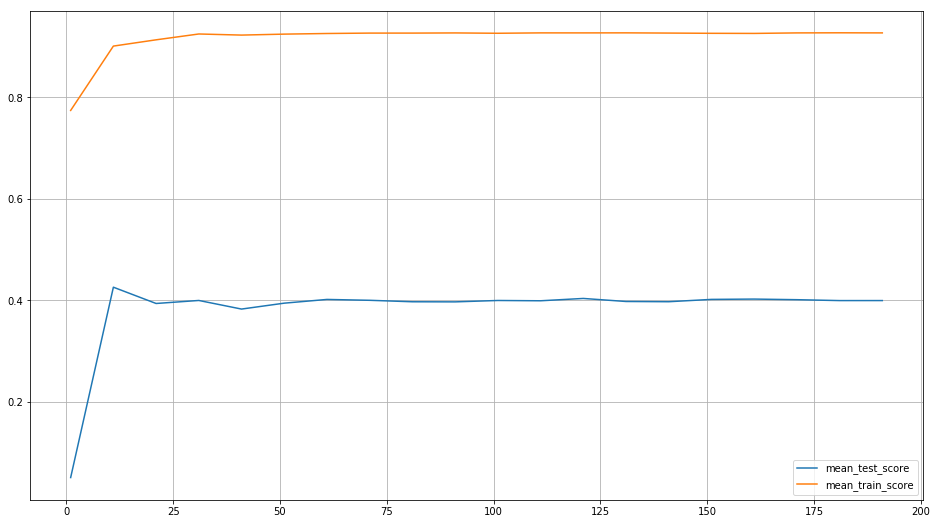

In [92]:
m_test_s = clf_cv.cv_results_['mean_test_score']
m_train_s= clf_cv.cv_results_['mean_train_score']

plt.figure(figsize=(16,9))
plt.plot(np.arange(1,200,10),m_test_s, label = "mean_test_score")
plt.plot(np.arange(1,200,10),m_train_s, label = "mean_train_score")
plt.legend()
plt.grid()

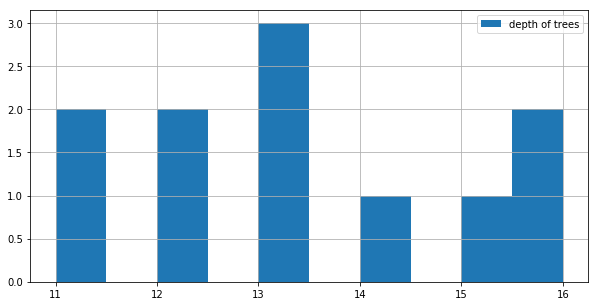

In [96]:
estimator = clf_cv.best_estimator_
estimator.fit(X_train, y_train)

depth = [estimator.tree_.max_depth for estimator in estimator]
plt.figure(figsize=(10,5))
plt.hist(depth, label = "depth of trees")
plt.legend()
plt.grid()

In [106]:
top5_important = estimator.feature_importances_.argsort()[::-1][:5]
for index in top5_important:
    print(dummies_train.columns[index])


USG
PER
WS
Minutes
OWS
